# An analysis of entertainment application losses

## Data overview

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# reading csv files and assigning the results to variables
visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'), 
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'), 
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') 
)

**Visits**

In [3]:
# printing the head of the DataFrame
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


- Column names and data (columns Region, Device, Channel) use lowercase and uppercase letters.

In [4]:
# printing information about the DataFrame
visits.info()

# computing a summary of statistics
visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


- Convert the Session Start and Session End column type to datetime;
- There are no gaps.

In [5]:
# checking for values in all columns 
for row in ['Region', 'Device', 'Channel']:
    print(row)
    print()
    print(visits[row].value_counts())

Region

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64
Device

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64
Channel

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64


In [6]:
# checking for duplicates
visits.duplicated().sum()

0

There are no duplicates.

**Orders**

In [7]:
# printing the head of the DataFrame
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


- Change the column names to snake case and lowercase.

In [8]:
# printing information about the DataFrame
orders.info()

# computing a summary of statistics
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.5+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


- Convert the Event Dt column type to datetime;
- There are no gaps.

In [9]:
# checking for values in all columns 
for row in orders:
    print(row)
    print()
    print(orders[row].value_counts())

User Id

901180916748    22
883098437811    20
512471511263    19
75337957494     19
295795879965    19
419015407499    18
83915658643     18
45776380753     18
484391243508    18
653462760786    18
916472122757    18
764086596354    18
703778684183    18
318840121099    18
897756565239    18
223402521888    17
901846729203    17
547684681026    17
587149754924    17
229280231731    17
386134185717    17
69231867367     17
33606575057     17
641347422979    17
683495082445    17
394809547668    17
493030266041    17
93521002889     17
628354296226    17
804079690050    17
                ..
78006996350      1
833247292642     1
524655385841     1
309821353343     1
884981937500     1
368372202781     1
998093264216     1
638440916191     1
484787213453     1
58654184653      1
260008152262     1
448715799869     1
319700239578     1
813050324155     1
818513126542     1
192937180381     1
408638596206     1
476046705794     1
291621174472     1
41399209198      1
138612231406     1
890

In [10]:
# checking for duplicates
orders.duplicated().sum()

0

There are no duplicates.

**Costs**

In [11]:
# printing the head of the DataFrame
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


- Change the column names and data to lowercase.

In [12]:
# printing information about the DataFrame
costs.info()

# computing a summary of statistics
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


- Convert the dt column type to datetime;
- There are no gaps.

In [13]:
# checking for values in all columns 
for row in ['Channel']:
    print(row)
    print()
    print(costs[row].value_counts())

Channel

MediaTornado          180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
RocketSuperAds        180
FaceBoom              180
lambdaMediaAds        180
YRabbit               180
TipTop                180
Name: Channel, dtype: int64


In [14]:
# checking for duplicates
costs.duplicated().sum()

0

There are no duplicates.

**Conclusion**

Preliminary version of data processing.

Visits table:

- Column names and data (columns Region, Device, Channel) use lowercase and uppercase letters. Change the column names to snake case and data to lowercase;
- Convert the Session Start and Session End column type to datetime.

Orders table:

- Change the column names to snake case and lowercase;
- Convert the Event Dt column type to datetime.

Costs table:

- Change the column names and data (Channel) to lowercase;
- Convert the dt column type to datetime.

## Data preprocessing

In [15]:
# renaming columns in all DataFrames 
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue'] 
costs.columns = ['dt', 'channel', 'costs']

In [16]:
# lowercasing the 'region', 'device', 'channel' columns in the visits table
for column in visits[['region','device','channel']]:
    visits[column] = visits[column].str.lower()
    
# lowercasing the channel' column in the costs table
for column in costs[['channel']]:
    costs[column] = costs[column].str.lower()   

In [17]:
# changing the data type to datetime
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d %H:%M:%S')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = '%Y-%m-%d')
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

**Conclusion**

- Renamed columns in all tables;
- Lowercased data in tables visits ('region','device','channel') and costs ('channel');
- Changed the data type to datetime in visits ('session_start', 'session_end'), orders ('event_dt'), costs ('dt').

## Setting up functions to calculate LTV, ROI, retention and conversion rates

In [18]:
# LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # add purchase information to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # group by cohort if there is 0 in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # create a grouping function based on the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # create a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # calculate accumulated revenue
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes beyond the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # create dataframe with user data and CAC values,
        # add parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC based on parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # the final table shows cohort sizes, CACs, and ROIs in lifetimes that do not exceed analysis horizons
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

In [19]:
# retention rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to the dimensions list
    dimensions = ['payer'] + dimensions

    # exclude users who did not make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # create a grouping function based on the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [20]:
# conversion rate

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase information to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if dimensions = 0
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # create a grouping function based on the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

As well as functions for visualizing these metrics — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [21]:
# frame smoothing

def filter_data(df, window):
    # for each column apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [22]:
# visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table leave only the important lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the retention table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the chart table - two columns and two rows, four cells total
    # in the first cell build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell build retention curves for non-paying users
    # vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell - the retention dynamics for paying users
    ax3 = plt.subplot(2, 2, 3)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and plot chart
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of acquisition')
    plt.title(
        'Dynamics of retaining paying users on day {}'.format(
            horizon
        )
    )

    # in the fourth cell - the retention dynamics for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and plot chart
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of acquisition')
    plt.title(
        'Dynamics of retaining non-paying users on day {}'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [23]:
# visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table leave only the important lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the second graph - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamics of user conversion on day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
# visualizing LTV and ROI 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing graphs
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the LTV dynamics table leave only the important lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # CAC in a separate DataFrame
    cac_history = roi_history[['cac']]

    # exclude the sizes of cohorts and cac from the ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph - ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamics of user LTV on day {}'.format(horizon))

    # the third graph - cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamics of customer acquisition cost')

    # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Rate of return')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth graph - roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Rate of return')
    plt.xlabel('Date of acquisition')
    plt.title('Dynamics of user ROI on day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

## Exploratory data analysis

- Create user profiles. Identify the minimum and maximum date of acquisition of users.
- Check:
    - What countries do the users come from? Which countries have the most paying users? 
    - What devices do they use? What devices do paying users visit from most often?
    - What advertising channels were used to acquire users? Which channels bring in the most paying users?

In [25]:
# creating user profile 

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # first visits parameters
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # determine the date of the first visit for cohort analysis
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # add flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # count the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    profiles['dt'] = pd.to_datetime(profiles['dt'])
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    
    # combine advertising spending and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition = zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [26]:
# saving user profiles in a variable
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [27]:
# identifying the minimum and maximum date of acquisition of users
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

display('Minimum date of acquiring of users:', min_analysis_date)
display('Maximum date of acquiring of users:', max_analysis_date)

'Minimum date of acquiring of users:'

Timestamp('2019-05-01 00:00:00')

'Maximum date of acquiring of users:'

Timestamp('2019-10-27 00:00:00')

**What countries do the users come from? Which countries have the most paying users?**

In [28]:
# calculating the number of users and percentage of users by country
country_share = pd.DataFrame()
country_share['user_count'] = profiles.groupby('region')['user_id'].count()
country_share['share'] = (country_share['user_count'] / profiles['region'].count()) * 100
country_share = country_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})
country_share

,user_count,share
region,,
united states,100002,66.66%
uk,17575,11.72%
france,17450,11.63%
germany,14981,9.99%


66.7% of users are from the USA, 11-12% are from France and England, 10% of users are from Germany.

In [29]:
# calculating the paying users and percentage of paying users by country
country_payer_share = pd.DataFrame()
country_payer_share['user_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
country_payer_share['share'] = ((country_payer_share['user_count'] / profiles.query(
    'payer == True')['region'].count()) * 100)
country_payer_share = country_payer_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})
country_payer_share

,user_count,share
region,,
united states,6902,77.72%
uk,700,7.88%
france,663,7.47%
germany,616,6.94%


77.7% of paying users are from the USA, 7-8% are from France and England, the least paying users are from Germany (6.94%).

In [30]:
# calculating the percentage of paying users by country from the total number of users 
total_country_share = pd.DataFrame()
total_country_share['user_count'] = profiles.groupby('region')['user_id'].count()
total_country_share['share'] = (total_country_share['user_count'] / profiles['region'].count()) * 100

total_country_share['payer_user_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
total_country_share['payer_share'] = ((total_country_share['payer_user_count'] / total_country_share['user_count']) * 100)

total_country_share = total_country_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})
total_country_share

,user_count,share,payer_user_count,payer_share
region,,,,
united states,100002,66.66%,6902,6.90%
uk,17575,11.72%,700,3.98%
france,17450,11.63%,663,3.80%
germany,14981,9.99%,616,4.11%


- Among US users (100002), the percentage of paying users is 6.90% (6902 people);
- Among users from England (17575), the percentage of paying users is 3.98% (700 people);
- Among users from France (17450), the percentage of paying users is 3.80% (663 people);
- Among users from Germany (14981), the percentage of paying users is 4.1% (616 people).

**What devices do they use? What devices do paying users visit from most often?**

In [31]:
# calculating the number of users and percentage of users by device
device_share = pd.DataFrame()
device_share['user_count'] = profiles.groupby('device')['user_id'].count()
device_share['share'] = device_share['user_count'] / profiles['region'].count() * 100
device_share = device_share.sort_values(by='share', ascending = False).style.format({'share': '{:.2f}%'})
device_share

,user_count,share
device,,
iphone,54479,36.32%
android,35032,23.35%
pc,30455,20.30%
mac,30042,20.03%


Most users use Iphone (36.23%) and Android (23.35%) mobile devices, followed by PC(20%) and Mac (20%).

In [32]:
# calculating the paying users and percentage of paying users by devices
device_payer_share = pd.DataFrame()
device_payer_share['user_count'] = profiles.query('payer == True').groupby('device')['user_id'].count() 
device_payer_share['share'] =  device_payer_share['user_count'] / profiles.query('payer == True')['device'].count() * 100
device_payer_share = device_payer_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'}) 
device_payer_share 

,user_count,share
device,,
iphone,3382,38.08%
android,2050,23.08%
mac,1912,21.53%
pc,1537,17.31%


Most paying users use Iphone (38%) and Android (23%) mobile devices, followed by Mac (21.5%) and PC (17.3%).

In [33]:
# calculating the percentage of paying users by device from the total number of users 
total_device_share = pd.DataFrame()
total_device_share['user_count'] = profiles.groupby('device')['user_id'].count()
total_device_share['share'] = (total_device_share['user_count'] / profiles['device'].count()) * 100

total_device_share['payer_user_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
total_device_share['payer_share'] = ((total_device_share['payer_user_count'] / total_device_share['user_count']) * 100)

total_device_share = total_device_share.sort_values(by='share', ascending = False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})
total_device_share

,user_count,share,payer_user_count,payer_share
device,,,,
iphone,54479,36.32%,3382,6.21%
android,35032,23.35%,2050,5.85%
pc,30455,20.30%,1537,5.05%
mac,30042,20.03%,1912,6.36%


- Among iphone users (54479), the percentage of paying users is 6.21% (3382 people);
- Among android users (35032), the percentage of paying users is 5.85% (2050 people);
- Among pc users (30455), the percentage of paying users is 5.05% (1537 people);
- Among mac users (30042), the percentage of paying users is 6.36% (1912 people).

**What advertising channels were used to acquire users? Which channels bring in the most paying users?**

In [34]:
# calculating the number of users and percentage of users by advertising channels
channel_share = pd.DataFrame()
channel_share['user_count'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = (channel_share['user_count'] / profiles['channel'].count()) * 100
channel_share = channel_share.sort_values(by = 'share', ascending = False).style.format({'share' : '{:.2f}%'})
channel_share

,user_count,share
channel,,
organic,56439,37.62%
faceboom,29144,19.43%
tiptop,19561,13.04%
opplecreativemedia,8605,5.74%
leapbob,8553,5.70%
wahoonetbanner,8553,5.70%
rocketsuperads,4448,2.97%
mediatornado,4364,2.91%
yrabbit,4312,2.87%


Most users came from organic traffic (37.62%), followed by faceboom (19.43%) and tiptop (13.04%). The smallest number of users came through lambdamediaads (1.43%).

In [35]:
# calculating the paying users and percentage of paying users by advertising channels
channel_payer_share = pd.DataFrame()

channel_payer_share['user_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer_share['share'] = channel_payer_share['user_count'] / profiles.query('payer == True')['channel'].count() * 100

channel_payer_share = channel_payer_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})
channel_payer_share

,user_count,share
channel,,
faceboom,3557,40.05%
tiptop,1878,21.15%
organic,1160,13.06%
wahoonetbanner,453,5.10%
adnonsense,440,4.95%
rocketsuperads,352,3.96%
leapbob,262,2.95%
opplecreativemedia,233,2.62%
lambdamediaads,225,2.53%


Most paying users came through faceboom (40.05%). Then through tiptop (21.15%) and organic (13.06%). The smallest number of paying users came through mediatornado (1.76%).

In [36]:
# calculating the percentage of paying users by advertising channels from the total number of users 
total_channel_share = pd.DataFrame()
total_channel_share['user_count'] = profiles.groupby('channel')['user_id'].count()
total_channel_share['share'] = total_channel_share['user_count'] / profiles['channel'].count() * 100

total_channel_share['payer_user_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
total_channel_share['payer_share'] = total_channel_share['payer_user_count'] / total_channel_share['user_count'] * 100

total_channel_share = total_channel_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%', 'payer_share' : '{:.2f}%'})
total_channel_share

,user_count,share,payer_user_count,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
faceboom,29144,19.43%,3557,12.20%
tiptop,19561,13.04%,1878,9.60%
opplecreativemedia,8605,5.74%,233,2.71%
leapbob,8553,5.70%,262,3.06%
wahoonetbanner,8553,5.70%,453,5.30%
rocketsuperads,4448,2.97%,352,7.91%
mediatornado,4364,2.91%,156,3.57%
yrabbit,4312,2.87%,165,3.83%


- Among users who came through organic traffic (56439), the share of paying users is 2.06% (1160);
- Among users who came through faceboom (29144), the share of paying users is 12.20% (3557);
- Among users who came through tiptop (19561), the share of paying users is 9.60% (1878).

**Conclusion**

By country:

- Among US users (100002), the percentage of paying users is 6.90% (6902 people);
- Among users from England (17575), the percentage of paying users is 3.98% (700 people);
- Among users from France (17450), the percentage of paying users is 3.80% (663 people);
- Among users from Germany (14981), the percentage of paying users is 4.1% (616 people).

By device:
- Among iphone users (54479), the percentage of paying users is 6.21% (3382 people);
- Among android users (35032), the percentage of paying users is 5.85% (2050 people);
- Among pc users (30455), the percentage of paying users is 5.05% (1537 people);
- Among mac users (30042), the percentage of paying users is 6.36% (1912 people).

Acquisition channels:

- Among users who came through organic traffic (56439), the share of paying users is 2.06% (1160);
- Among users who came through faceboom (29144), the share of paying users is 12.20% (3557);
- Among users who came through tiptop (19561), the share of paying users is 9.60% (1878).

## Marketing

- How much money did the company spend on marketing costs? Total / by source / by month.
- How much did it cost on average to attract one user from each source?

**How much money did the company spend on marketing costs? Total / by source / by month**

In [37]:
# calculating marketing costs
total_costs = costs['costs'].sum()
print("Total costs: {:.1f}".format(total_costs))

Total costs: 105497.3


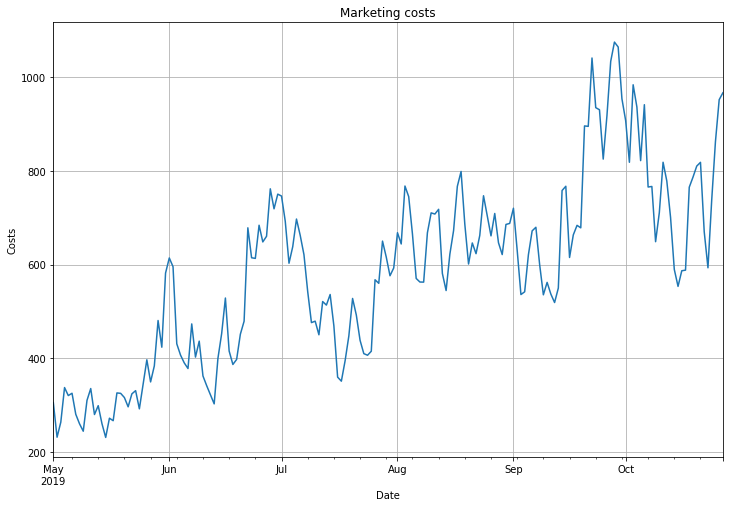

In [38]:
# grouping marketing costs by date
costs_grouped = costs.groupby('dt')['costs'].sum()

# visualizing marketing cost changes
costs_grouped.plot(figsize=(12, 8), grid=True, label='Marketing costs') 
plt.title('Marketing costs')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.show()

In [39]:
# calculating each source's marketing costs
costs_per_channel = pd.DataFrame()
costs_per_channel['costs'] = costs.groupby('channel')['costs'].sum()
costs_per_channel['share'] = costs_per_channel['costs'] / costs['costs'].sum() * 100
costs_per_channel = costs_per_channel.sort_values(by = 'costs', ascending = False)
costs_per_channel.style.format({'share': '{:.2f}%', 'costs': '{:.2f}'})


,costs,share
channel,,
tiptop,54751.30,51.90%
faceboom,32445.60,30.75%
wahoonetbanner,5151.00,4.88%
adnonsense,3911.25,3.71%
opplecreativemedia,2151.25,2.04%
rocketsuperads,1833.00,1.74%
leapbob,1797.60,1.70%
lambdamediaads,1557.60,1.48%
mediatornado,954.48,0.90%


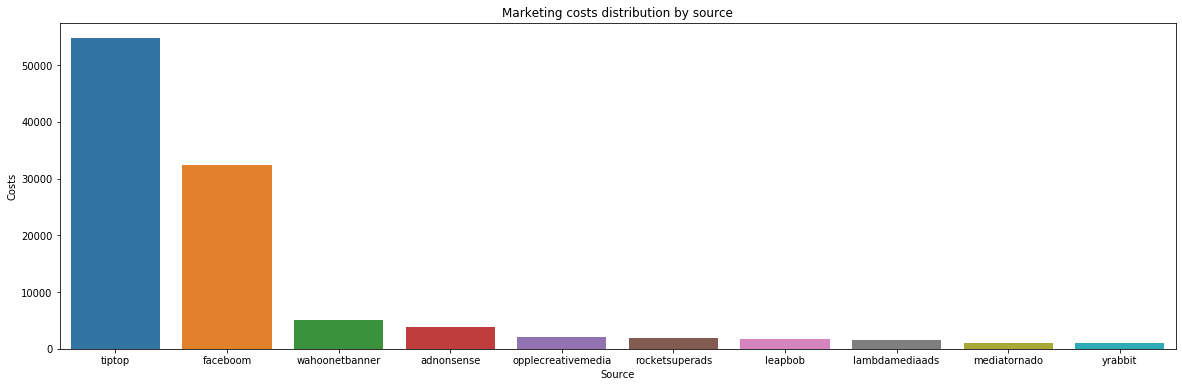

In [40]:
# visualizing each source's marketing costs
plt.figure(figsize=(20,6))
sns.barplot(data = costs_per_channel, x = costs_per_channel.index, y = 'costs')
plt.title('Marketing costs distribution by source')
plt.ylabel('Costs')
plt.xlabel('Source')
plt.show()

- TipTop (51.9%) and FaceBoom (30.75%) account for most of the costs;
- The cost of other sources does not exceed 5%.

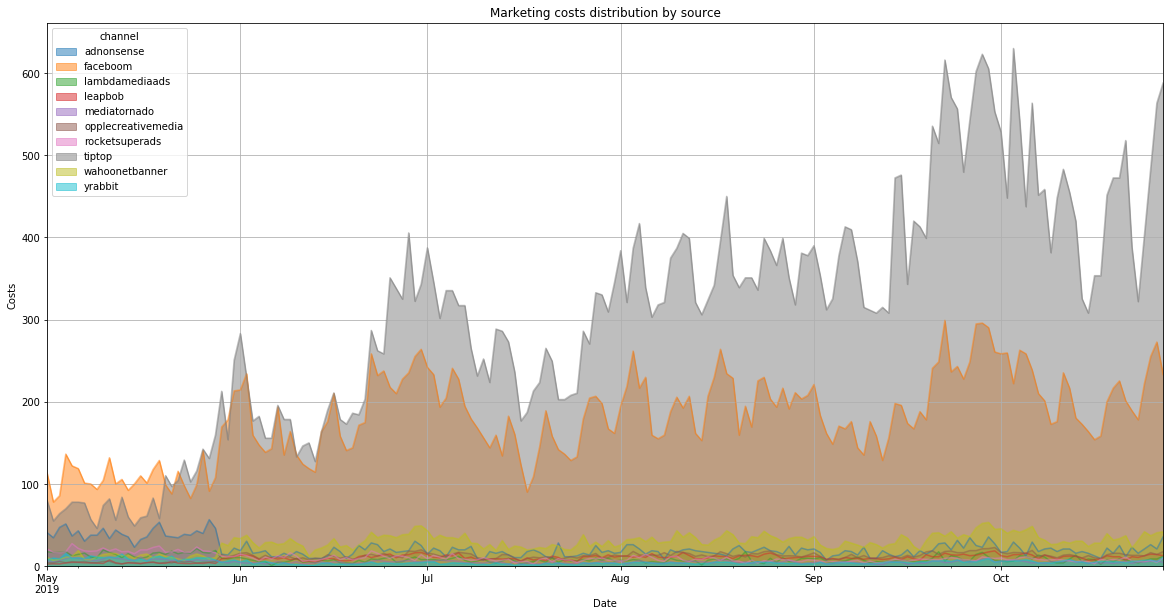

In [41]:
# visualizing each source's marketing cost changes
dt_costs = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')

dt_costs.plot.area(figsize=(20, 10), grid=True, stacked=False) 
plt.title('Marketing costs distribution by source')
plt.ylabel('Costs')
plt.xlabel('Date')
plt.show()

- The costs of TipTop and FaceBoom have increased over time. TipTop costs over 600, FaceBoom costs around 300.
- Other sources are much cheaper.

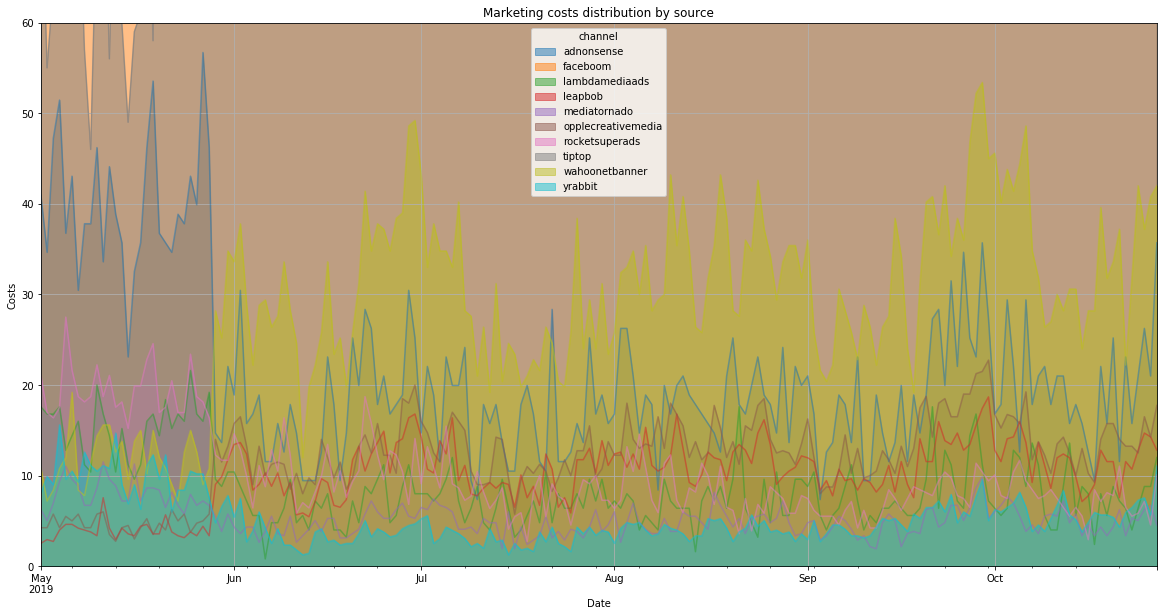

In [42]:
# zoom in on the chart to see it in greater detail
dt_costs = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')

dt_costs.plot.area(figsize=(20, 10), grid=True, stacked=False) 
plt.title('Marketing costs distribution by source')
plt.ylabel('Costs')
plt.xlabel('Date')
plt.ylim((0, 60))
plt.show()

- As well as TipTop and FaceBoom, Wahoonetbanner's costs are increasing.
- On the other hand, Adnonsense's costs are decreasing.
- Other sources rarely exceed 20.

**How much did it cost on average to attract one user from each source?**

Determine the average CAC per user over the entire project and for each source of traffic.

In [43]:
# excluding organic source, since the company have not paid for it
profiles2 = profiles[profiles['channel'] != 'organic']

In [44]:
# displaying the head of the DataFrame
profiles2.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000


In [45]:
# calculating the mean and median cost per user acquired (the acquisition_cost column of the profiles2 table)
profiles2.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


- Median cost of acquiring one user - 1.08;
- The mean cost of acquiring one user - 1.12;
- The maximum cost of acquiring one user - 3.71.

There are outliers in the data. Some periods may have had higher costs than others.

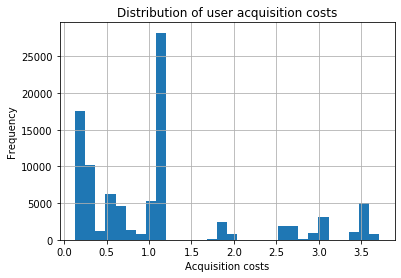

In [46]:
# visualizing the distribution of user acquisition costs
profiles2['acquisition_cost'].hist(bins=30)
plt.title('Distribution of user acquisition costs')
plt.ylabel('Frequency')
plt.xlabel('Acquisition costs')
plt.show()

Indeed, there are a small number of outliers in the data.

In [47]:
# calculating the mean cost of acquiring one user for the entire project
cac = (profiles2
       .agg({'acquisition_cost': 'mean'}) 
)
print('The mean cost of acquiring one user for the entire project:', round(cac['acquisition_cost'], 2))

The mean cost of acquiring one user for the entire project: 1.13


In [48]:
# calculating the mean cost of acquiring one user by source
cac_by_channel = profiles2.pivot_table(index = 'channel', values ='acquisition_cost', aggfunc = 'mean').sort_values(by = 'acquisition_cost', ascending = False)
cac_by_channel.style.format({'acquisition_cost': '{:.2f}'})

,acquisition_cost
channel,
tiptop,2.80
faceboom,1.11
adnonsense,1.01
lambdamediaads,0.72
wahoonetbanner,0.60
rocketsuperads,0.41
opplecreativemedia,0.25
yrabbit,0.22
mediatornado,0.22


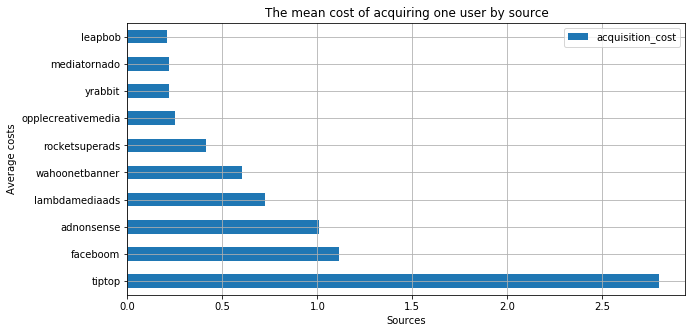

In [49]:
# visualizing the mean cost of acquiring one user by source
cac_by_channel.plot(figsize=(10, 5),
    grid = True, kind = 'barh')
plt.title('The mean cost of acquiring one user by source')
plt.xlabel('Sources')
plt.ylabel('Average costs')
plt.show()


- We see that TipTop has the highest average cost of attracting one user (average cost - 2.80 per user), followed by FaceBoom and AdNonSense (average cost - 1.1 and 1 per user);
- For all other sources, the average cost does not exceed 1 per user.

**Conclusion**

Total marketing costs by source:
- TipTop (51.9%) and FaceBoom (30.75%) account for most of the costs;
- The cost of other sources does not exceed 5%.

Marketing spend by time, by source:
- The costs of TipTop and FaceBoom have increased over time. TipTop costs over 600, FaceBoom costs around 300.
- As well as TipTop and FaceBoom, Wahoonetbanner's costs are increasing.
- On the other hand, Adnonsense's costs are decreasing.
- Other sources rarely exceed 20.

Average cost of acquiring one user: 1.13

Average user acquisition cost by source
- TipTop has the highest average cost of attracting one user (average cost - 2.80 per user), followed by FaceBoom and AdNonSense (average cost - 1.1 and 1 per user);
- For all other sources, the average cost does not exceed 1 per user.

## Calculating LTV, ROI, retention and conversion rates

### LTV, ROI, retention and conversion rates

I will use the profiles2 table where I filtered out users from an organic source.

In [50]:
# setting the observation date and horizon days
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Call the functions get_ltv() and plot_ltv_roi() to calculate and visualize LTV and ROI

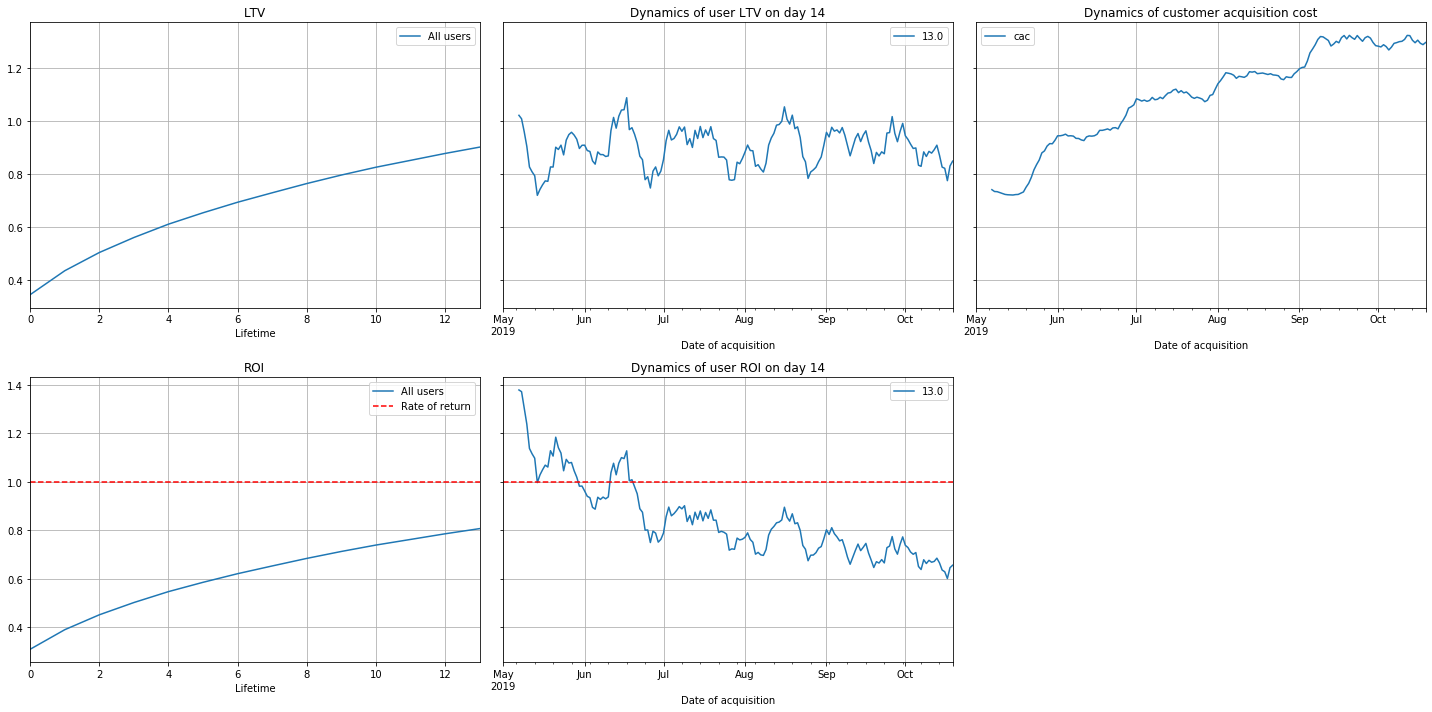

In [51]:
# calculating LTV and ROI
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles2, orders, observation_date, horizon_days)


# vizualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- There is seasonality in LTV, but it is generally stable. So, there is no problem with the quality of users;
- CAC is unstable. Advertising costs increase over time.
- Advertising does not pay off by the end of the 2nd week.
- Until June, ROI of user was above the payback level, but since then, it has fallen. 

In order to understand the reasons, let's take a look at all the user characteristics available - devices, countries, channels.

### LTV, ROI, retention and conversion rates by device

Call the functions get_ltv() and plot_ltv_roi() to calculate and visualize LTV and ROI by device.

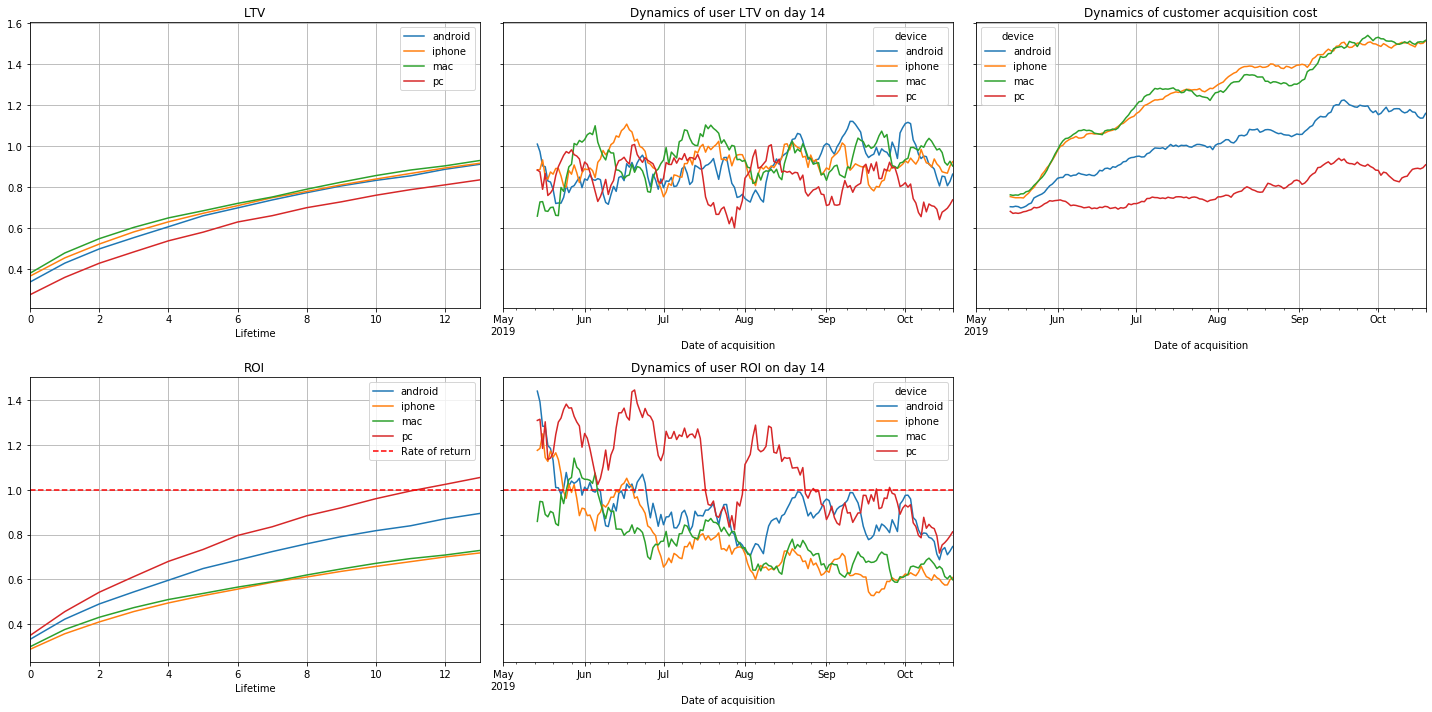

In [52]:
# calculating LTV and ROI by device
dimensions = ['device']
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles2, orders, observation_date, horizon_days, dimensions = dimensions)

# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

- There is a seasonality in LTV, but more or less stable.
- The cost of acquiring users of all devices increased over the period under review. The lowest cost is for PC users, while the highest cost is for Mac and Iphone users.
- Only PC advertising pays off by the end of the second week .
- The iphone and Android users paid off until June, and then they stopped. Mac users didn't pay off at all. PC users paid off until September, and they were on the verge of payback.

Pay attention to Mac and iPhone owners. Their cost of attraction increases from month to month, and their payback suffers as a result.

Call the functions get_conversion() and plot_conversion() to calculate and visualize conversion rate by device.

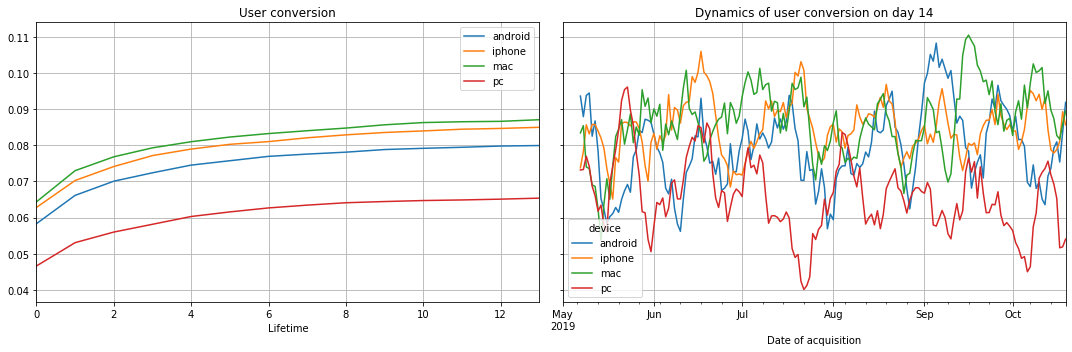

In [53]:
# calculating conversion rate by device
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles2, orders, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Users of Mac, iPhone and Android convert well. Maybe it's a matter of retention rate. 

Call the functions get_retention() and plot_retention() to calculate and visualize retention rate by device.

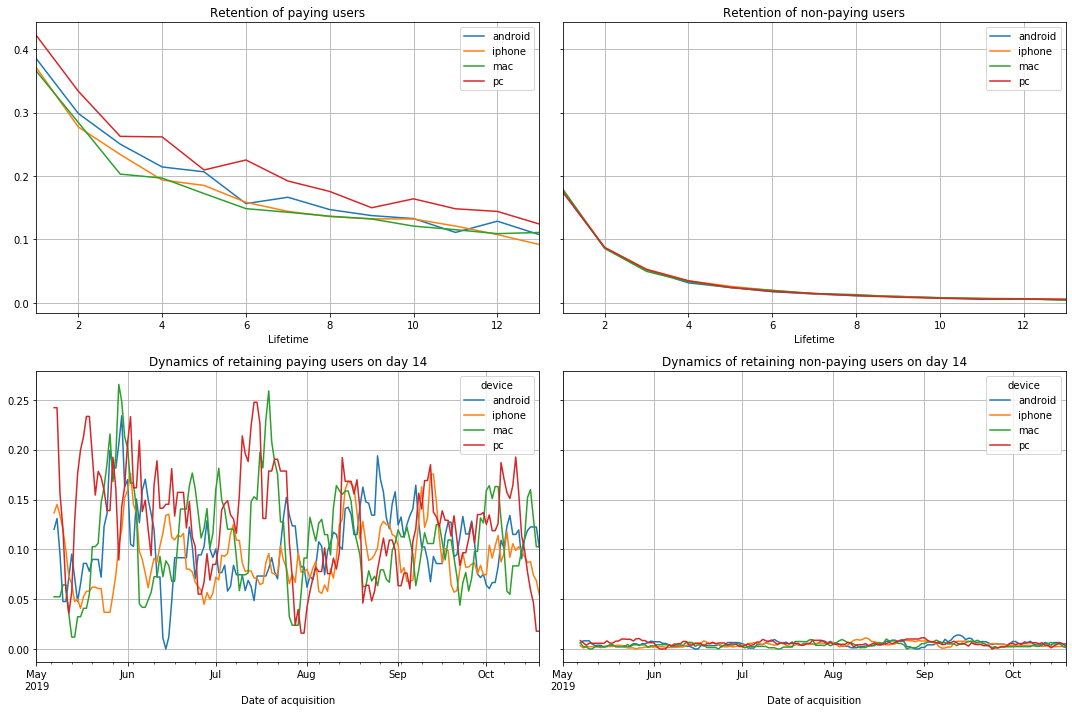

In [54]:
# calculating retention rate by device
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_retention(retention_grouped, retention_history, horizon_days) 

- Paying PC users are better retained than iPhone and Mac users.
- Non-paying users are low retained.

### LTV, ROI, retention and conversion rates by country

Call the functions get_ltv() and plot_ltv_roi() to calculate and visualize LTV and ROI by country.

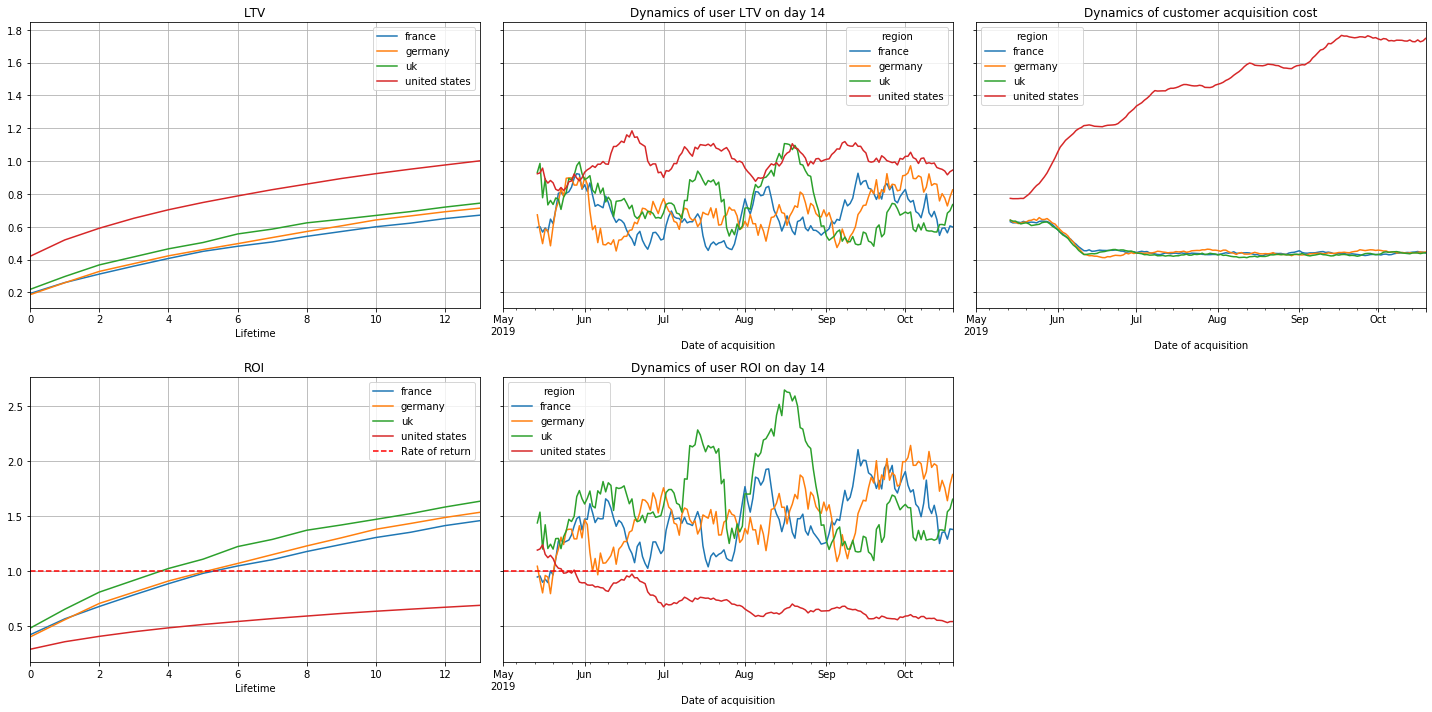

In [55]:
# calculating LTV and ROI by country
dimensions = ['region']
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles2, orders, observation_date, horizon_days, dimensions = dimensions)

# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

- There is seasonality in LTV, but it is generally stable. 
- The US has the highest cost of acquiring users and it is growing. The cost of acquiring users from England, Germany and France is approximately the same.
- In the US, where we have the majority of users, there is a low rate of return on advertising. In England, Germany and France it is quite high.
- England and Germany pay off best of all. Worst of all is the United States, where user payback began to fall from the end of June 2019. Perhaps a bad product launch or some product change played a role.

Take note of US users.

Call the functions get_conversion() and plot_conversion() to calculate and visualize conversion rate by country.

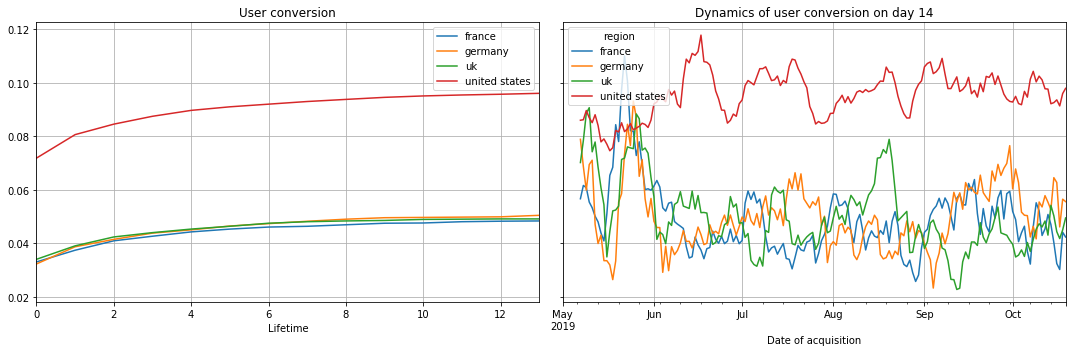

In [56]:
# calculating conversion rate by country

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles2, orders, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

A low conversion rate among users from England, Germany and France, but we don't have many users there. A high conversion rate in the USA.

Call the functions get_retention() and plot_retention() to calculate and visualize retention rate by country.

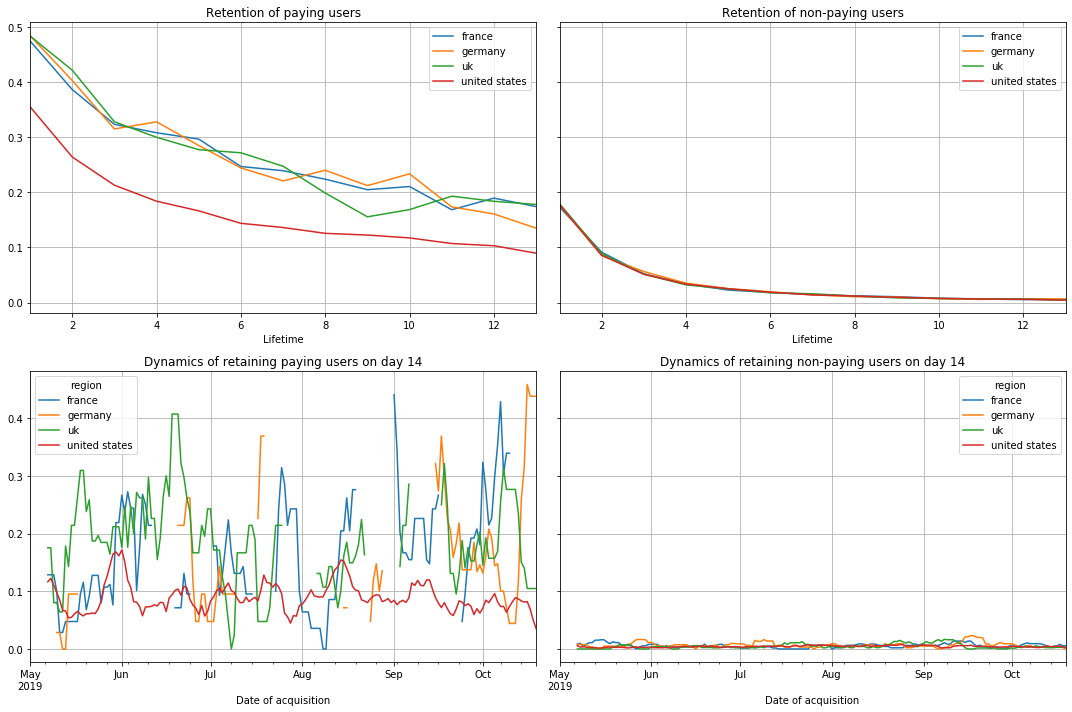

In [57]:
# calculating retention rate by country
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_retention(retention_grouped, retention_history, horizon_days) 

- Paying US users are low retained.
- Non-paying users are low retained.

### LTV, ROI, retention and conversion rates by advertising channel

Call the functions get_ltv() and plot_ltv_roi() to calculate and visualize LTV and ROI by advertising channels.

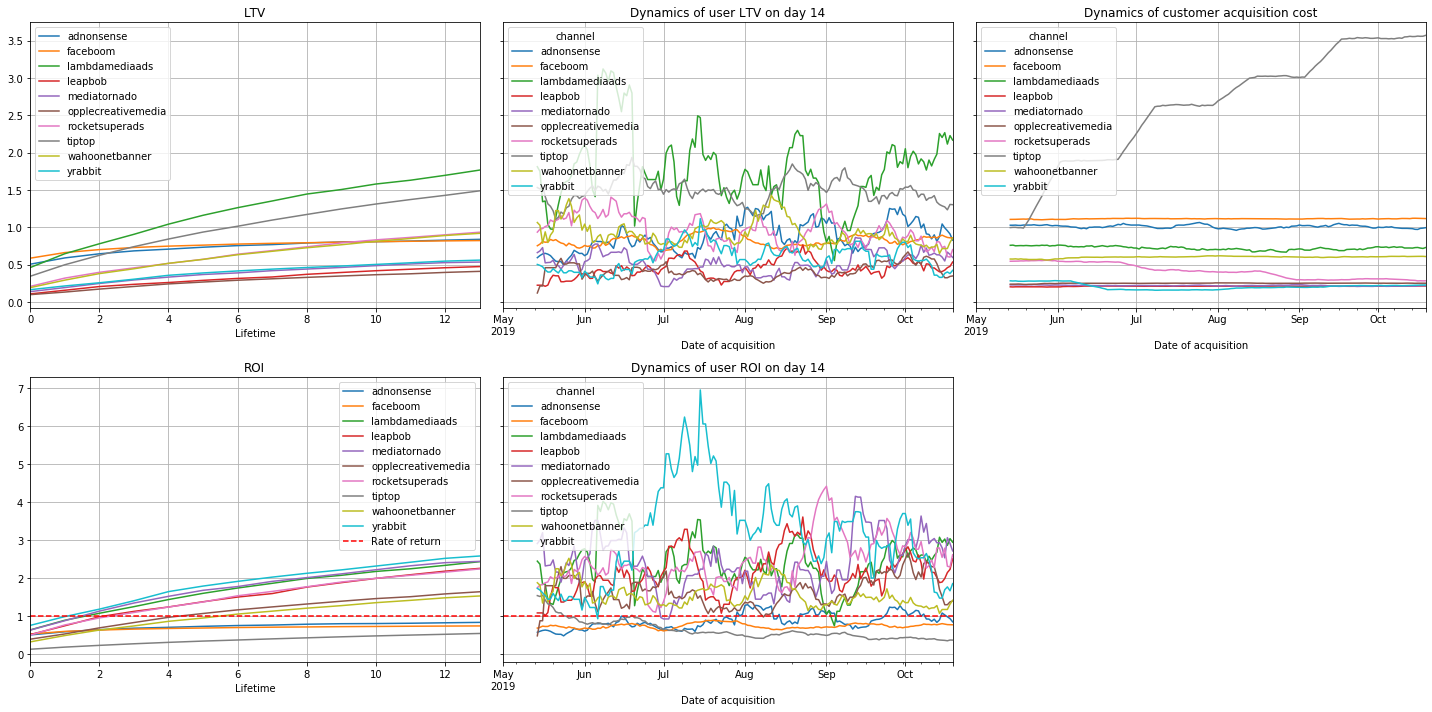

In [58]:
# calculating LTV and ROI by advertising channels
dimensions = ['channel']
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles2, orders, observation_date, horizon_days, dimensions = dimensions)

# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

- The cost of attracting users from the TipTop advertising channel is constantly growing.
- Users attracted from AdNonSense, FaceBoom, and TipTop users do not pay off.
- In July, the ROI of users on day 14 was high for the YRabbit advertising network.

Call the functions get_conversion() and plot_conversion() to calculate and visualize conversion rate by advertising channels. 

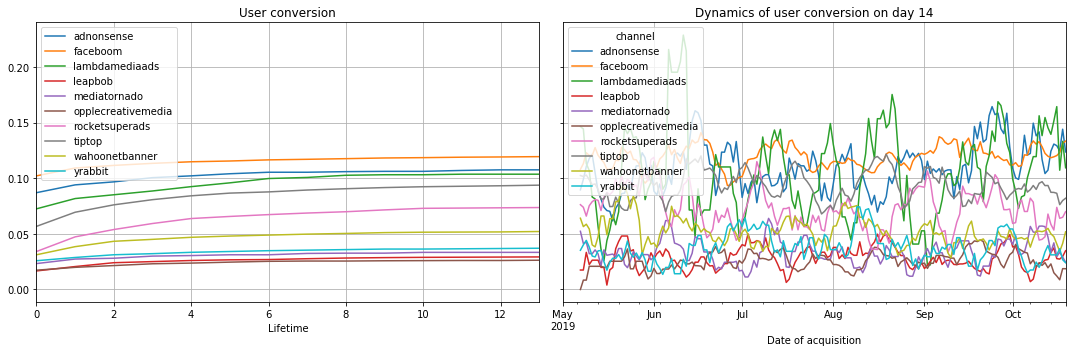

In [59]:
# calculating conversion rate by advertising channels
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles2, orders, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Channels such as Leapbob, Applecreativemedia, Mediatornado, YRabbit channels do not convert well.

Call the functions get_retention() and plot_retention() to calculate and visualize retention rate by advertising channels. 

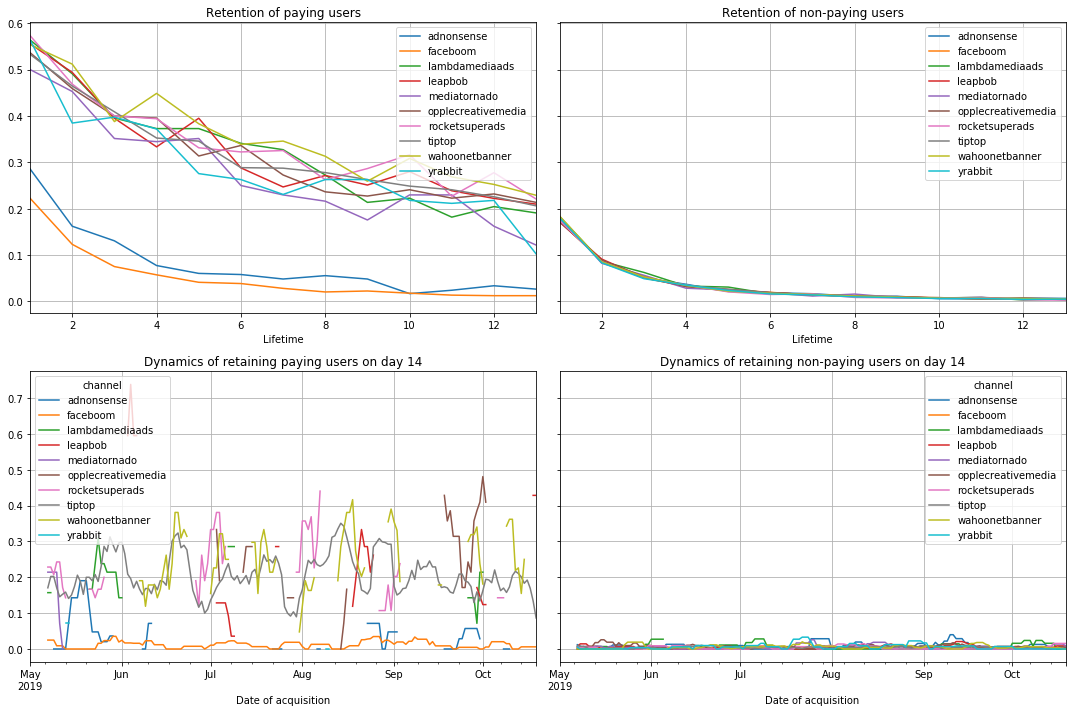

In [60]:
# calculating retention rate by advertising channels
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions=dimensions
)

# visualizing
plot_retention(retention_grouped, retention_history, horizon_days)

- Paying FaceBoom and AdNonSense users are low retained.
- Non-paying users are low retained.

**Conclusion**

Total advertising payback:

- In the second week, advertising costs rise, but do not pay off. Return on investment falls. 

LTV, ROI, retention and conversion rates by device:

- The cost of acquiring users of all devices increased over the period under review. The lowest cost is for PC users, while the highest cost is for Mac and Iphone users.
- Only PC advertising pays off by the end of the second week .
- The iPhone and Android users paid off until June, and then they stopped. Mac users didn't pay off at all. PC users paid off until September, and they were on the verge of payback.
- Users of Mac, iPhone and Android convert well. Maybe it's a matter of retention rate. 
- Paying PC users are better retained than iPhone and Mac users.
- Pay attention to Mac and iPhone owners. Their cost of attraction increases from month to month, and their payback suffers as a result.

LTV, ROI, retention and conversion rates by country:

- The US has the highest cost of acquiring users and it is growing. The cost of acquiring users from England, Germany and France is approximately the same.
- In the US, where we have the majority of users, there is a low rate of return on advertising. In England, Germany and France it is quite high.
- England and Germany pay off best of all. Worst of all is the United States, where user payback began to fall from the end of June 2019. Perhaps a bad product launch or some product change played a role.
- A low conversion rate among users from England, Germany and France, but we don't have many users there. A high conversion rate in the USA.
- Paying US users are low retained.
- Take note of US users.

LTV, ROI, retention and conversion rates by advertising channel:

- The cost of attracting users from the TipTop advertising channel is constantly growing.
- Users attracted from AdNonSense, FaceBoom, and TipTop users do not pay off.
- In July, the ROI of users on day 14 was high for the YRabbit advertising network.
- Channels such as Leapbob, Applecreativemedia, Mediatornado, YRabbit channels do not convert well.
- Paying FaceBoom and AdNonSense users are low retained.

Taking into consideration that today is November 1, 2019 and that the payback should occur no later than 2 weeks after acquiring users, we can conclude:

- Advertising is close to payback by the end of the 2nd week.
- Pay attention to Mac and iPhone users, as their cost of attraction is increasing with each passing month, and their payback is decreasing. It is also important to pay attention to US users, as well as TipTop and FaceBoom advertising channels.
- An irregular distribution of advertising funds can cause payback problems (more funds invested in some source than in others).

## Final conclusion

**The reasons for inefficiency in user acquisition**

In the second week, advertising costs rise, but do not pay off. Return on investment falls. Let's examine all the available user characteristics - devices, countries, channels - in order to understand the reasons.

LTV, ROI, retention and conversion rates by device:

- The cost of acquiring users of all devices increased over the period under review. The lowest cost is for PC users, while the highest cost is for Mac and Iphone users.
- Only PC advertising pays off by the end of the second week .
- The iPhone and Android users paid off until June, and then they stopped. Mac users didn't pay off at all. PC users paid off until September, and they were on the verge of payback.
- Users of Mac, iPhone and Android convert well. Maybe it's a matter of retention rate. 
- Paying PC users are better retained than iPhone and Mac users.
- Pay attention to Mac and iPhone owners. Their cost of attraction increases from month to month, and their payback suffers as a result.

LTV, ROI, retention and conversion rates by country:

- The US has the highest cost of acquiring users and it is growing. The cost of acquiring users from England, Germany and France is approximately the same.
- In the US, where we have the majority of users, there is a low rate of return on advertising. In England, Germany and France it is quite high.
- England and Germany pay off best of all. Worst of all is the United States, where user payback began to fall from the end of June 2019. Perhaps a bad product launch or some product change played a role.
- A low conversion rate among users from England, Germany and France, but we don't have many users there. A high conversion rate in the USA.
- Paying US users are low retained.
- Take note of US users.

LTV, ROI, retention and conversion rates by advertising channel:

- The cost of attracting users from the TipTop advertising channel is constantly growing.
- Users attracted from AdNonSense, FaceBoom, and TipTop users do not pay off.
- In July, the ROI of users on day 14 was high for the YRabbit advertising network.
- Channels such as Leapbob, Applecreativemedia, Mediatornado, YRabbit channels do not convert well.
- Paying FaceBoom and AdNonSense users are low retained.

**Marketing department recommendations for improving efficiency**

Pay attention to Mac and iPhone owners. The cost of their attraction is increasing each month, and their ROI is suffering. The company can make some interesting marketing offer for owners of these devices so that they pay off more. 

Pay attention to US users. Users from the US make up the majority of our users, but there is a high cost of user acquisition, and it is growing, along with the lowest return on advertising. In order to encourage users to spend money, advertising needs to be better or marketing offers need to be more interesting. It is also important to determine what caused the drop in user payback since June 2019.

The best results are seen in England and Germany. Perhaps you should target these ausiences more.

The cost of attracting users via the TipTop advertising channel is constantly increasing, but the expense does not pay off. It may be worthwhile to reduce the budget allocated to this network and redirect it to one that is more efficient.

Adnonsense, FaceBoom, TipTop channels do not pay off. By October, TipTop was approaching 650 spends, while FaceBoom was approaching 300. Aside from FaceBoom and Adnonsense, the rest of the acquisition channels are quite cheap and have a higher ROI. Paying users from FaceBoom and Adnonsense are poorly retained. The company can try to purchase traffic from cheaper, but profitable channels.